##PCA, Kmeans e Dendograma

##Importar Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,normalize

In [2]:
import warnings
warnings.filterwarnings('ignore')

##Importar Base de dados

In [4]:
data=pd.read_csv('/content/drive/MyDrive/Dataset_Excel_CSV/CreditCard_data.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


##Preparação de base de dados

In [6]:
X=data.drop('CUST_ID',axis=1)
X.fillna(method='ffill',inplace=True)

In [7]:
type(X)

pandas.core.frame.DataFrame

##Padronizar e Normalizar os dados

In [8]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

X_normalizer=normalize(X_scaler)

In [9]:
type(X_normalizer)

numpy.ndarray

In [10]:
X_normalizer=pd.DataFrame(X_normalizer)

##PCA (Análise de Componentes Principais)

* É um procedimento estatístico que usa uma transformação (ortogonal) da qual converte um conjunto de variáveis ​​correlacionadas em um conjunto de variáveis ​​não correlacionadas.

* É uma ferramenta amplamente utilizada em análise exploratória de dados e em ML para modelos preditivos.

* É uma técnica estatística não supervisionada usada para examinar as inter-relações entre um conjunto de variáveis

In [12]:
pca=PCA(n_components=2)
X_principal=pca.fit_transform(X_normalizer)
X_principal=pd.DataFrame(X_principal)
X_principal.columns=['P1','P2']

In [14]:
X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544828
2,0.330633,0.268879
3,-0.481656,-0.097610
4,-0.563512,-0.482506


In [30]:
def ClusterAglomerativo(cluster):
  agg=AgglomerativeClustering(n_clusters=cluster)
  y_pred=agg.fit_predict(X_principal)

  plt.figure(figsize=(6,6))
  plt.scatter(X_principal['P1'],X_principal['P2'],c=y_pred)
  plt.show()
  return y_pred

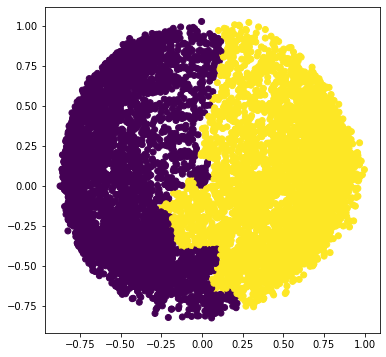

In [31]:
ypred2=ClusterAglomerativo(2)

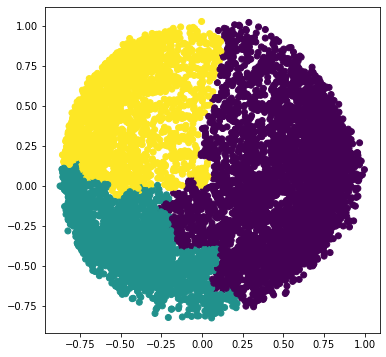

In [32]:
ypred3=ClusterAglomerativo(3)

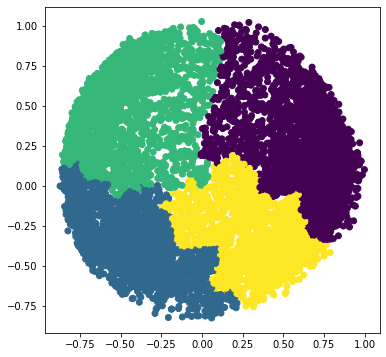

In [33]:
ypred4=ClusterAglomerativo(4)

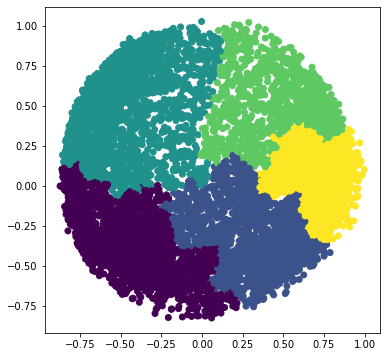

In [34]:
ypred5=ClusterAglomerativo(5)

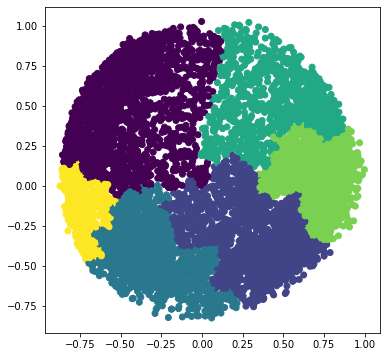

In [36]:
ypred6=ClusterAglomerativo(6)

##Análise da Pontuação da Silhueta

> Algoritmos supervisionados têm métricas para verificar sua qualidade de ajuste, como precisão, valor r-quadrado, sensibilidade, etc.
Mas, como medir a precisão ou qualidade de nossa técnica de agrupamento? 
Para isso serve a análise da pontuação da silhueta.

* A pontuação da silhueta é uma métrica usada para calcular a eficácia de uma técnica de agrupamento. Seu valor varia de -1 a 1.
1. ) 1: Os clusters de médias estão bem separados uns dos outros e claramente distintos.
2. ) 0: significa que os clusters são indiferentes (ou seja, a distância entre os clusters não é significativa).
3. ) -1: Significa que os clusters foram atribuídos de maneira errada


In [28]:
from sklearn.metrics import silhouette_score

In [29]:
k=[2,3,4,5,6]
sil_scores=[]

In [37]:
sil_scores.append(silhouette_score(X_principal,ypred2))
sil_scores.append(silhouette_score(X_principal,ypred3))
sil_scores.append(silhouette_score(X_principal,ypred4))
sil_scores.append(silhouette_score(X_principal,ypred5))
sil_scores.append(silhouette_score(X_principal,ypred6))

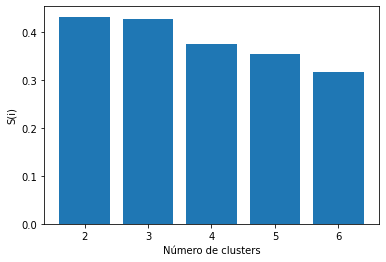

In [38]:
plt.bar(k,sil_scores)
plt.xlabel("Número de clusters")
plt.ylabel("S(i)")
plt.show()

Com base no gráfico de barras, o número ideal de clusters para os dados e técnica de clusterização fornecidos é 2

In [39]:
import scipy.cluster.hierarchy as shc

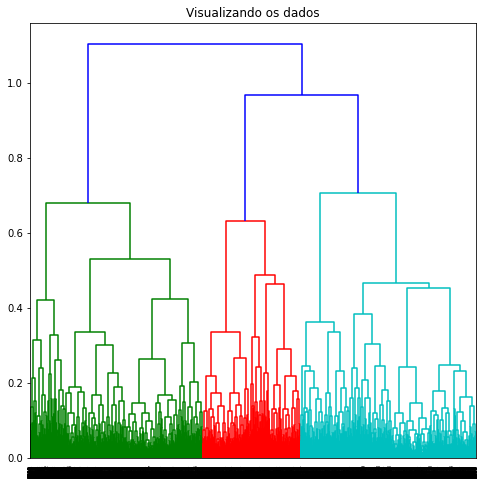

In [40]:
plt.figure(figsize=(8,8))
plt.title("Visualizando os dados")
Dendograma=shc.dendrogram((shc.linkage(X_principal,method='average')))